In [2]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy.matrices import BlockMatrix 
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing
import matplotlib.animation as manimation

matrix([[ 0.8660254,  0.5      ,  0.       ,  0.       ],
        [-0.5      ,  0.8660254,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  1.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ,  1.       ]])

<Figure size 432x288 with 0 Axes>

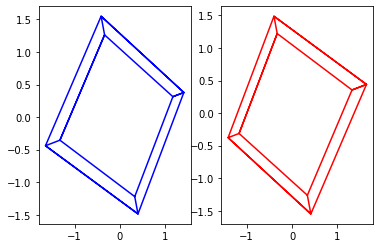

In [40]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Rotating Cube', artist='Brent A. Thorne',
                comment='a cube with corners draw with red dots and edges draw with blue lines')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

#D = np.matrix([[3,5,5,3,3,5,5,3],[1,1,0,0,1,1,0,0],[5,5,5,5,4,4,4,4],[1,1,1,1,1,1,1,1]])

# think of a better way to do this... (plotting min number of lines)
# ask Henry about how to create another Matrix of lines from points, 
# indeed this sounds like a transformation
# for now we'll just cook up the matrix to show the form
D = np.matrix(([[1,-1,-1, 1,1,  1,-1,-1, 1,  1, 1,-1,-1, -1,-1, 1, 1],\
                [1, 1,-1,-1,1,  1, 1,-1,-1,  1, 1, 1, 1, -1,-1,-1,-1],\
                [1, 1, 1, 1,1, -1,-1,-1,-1, -1, 1, 1,-1, -1, 1, 1,-1],\
                [1, 1, 1, 1,1,  1, 1, 1, 1,  1, 1, 1, 1,  1, 1, 1, 1]]))



def rot(thetaX,thetaY, thetaZ): 
    #rot X
    Tx = np.matrix([[1,0,0,0],\
            [0,np.cos(thetaX),-np.sin(thetaX),0],\
            [0,np.sin(thetaX),np.cos(thetaX),0],\
            [0,0,0,1]])
    #rot Y
    Ty = np.matrix([[np.cos(thetaY),0,np.sin(thetaY),0],\
            [0,1,0,0],\
            [-np.sin(thetaY),0,np.cos(thetaY),0],\
            [0,0,0,1]])

    #rot Z
    Tz = np.matrix([[np.cos(thetaZ),-np.sin(thetaZ),0,0],\
            [np.sin(thetaZ),np.cos(thetaZ),0,0],\
            [0,0,1,0],\
            [0,0,0,1]])
    return(Tz*Ty*Tx) # think about order of operatons here

def myplot(x,y):
    plt.clf()
    title='3d rotation projected into 2d'
    lim = 3
    plt.title(f"{title}"); 
    plt.xlabel("X axis"); 
    plt.ylabel("Y axis")
    plt.scatter(x,y, color ="red")
    plt.plot(x,y, color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    writer.grab_frame()

    
"""   
# Update the frames for the movie
n = 1000
theta = np.linspace(0, 6*np.pi, n)
with writer.saving(fig, "writer_test.mp4", 100):
    for i in theta:
        T=rot(i,i/2,0)
        M= P*(T*D)
        H = M[3]
        N = np.divide(M,H)[0:2]
        x,=N[0].tolist()
        y,=N[1].tolist()
        #plt.plot(x,y, color ="blue")
        myplot(x,y)
"""
d = 10 # distance of projection
s = 20 # stereo offset
P = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,-1/d,1]])
PR = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[-1/s,0,-1/d,1]])
PL = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[1/s,0,-1/d,1]])

i = -np.pi/6
T=rot(0,0,i)
M= PL*(T*D)
H = M[3]
N = np.divide(M,H)[0:2]
x1,=N[0].tolist()
y1,=N[1].tolist()

M= PR*(T*D)
H = M[3]
N = np.divide(M,H)[0:2]
x2,=N[0].tolist()
y2,=N[1].tolist()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x1,y1, color ="blue")
ax2.plot(x2,y2, color ="red")
T

In [6]:
T

matrix([[ 0.96592583,  0.12940952, -0.22414387,  0.        ],
        [ 0.        ,  0.8660254 ,  0.5       ,  0.        ],
        [ 0.25881905, -0.48296291,  0.8365163 ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [34]:
# display generated movie in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="writer_test.mp4" type="video/mp4">
</video></div>""")